## 28 - The blue planet
>Map oceans, rivers, and lakes. Focus on water today. Map the oceans, rivers, or lakes, diving deep into marine environments or water systems. 🌊🐋

In [1]:
import cmocean
import matplotlib.pyplot as plt
import mapping_funcs as mf
from mapping_funcs import Spilhaus as sp
import xarray as xr

In [17]:
ds = xr.open_dataset('gebco_2024/GEBCO_2024.nc', chunks='auto')
sp_df = sp.make_spilhaus_xy_gridpoints(spilhaus_res=2000)
lon, lat = sp.from_spilhaus_xy_to_lonlat(sp_df['x'], sp_df['y'])

sp_df['z'] = ds['elevation'].sel(
    lon=xr.DataArray(lon, dims="points"),
    lat=xr.DataArray(lat, dims="points"),
    method="nearest").data

pretty = sp.prettify_spilhaus_df(sp_df)
idx = pretty['z'] <= 0

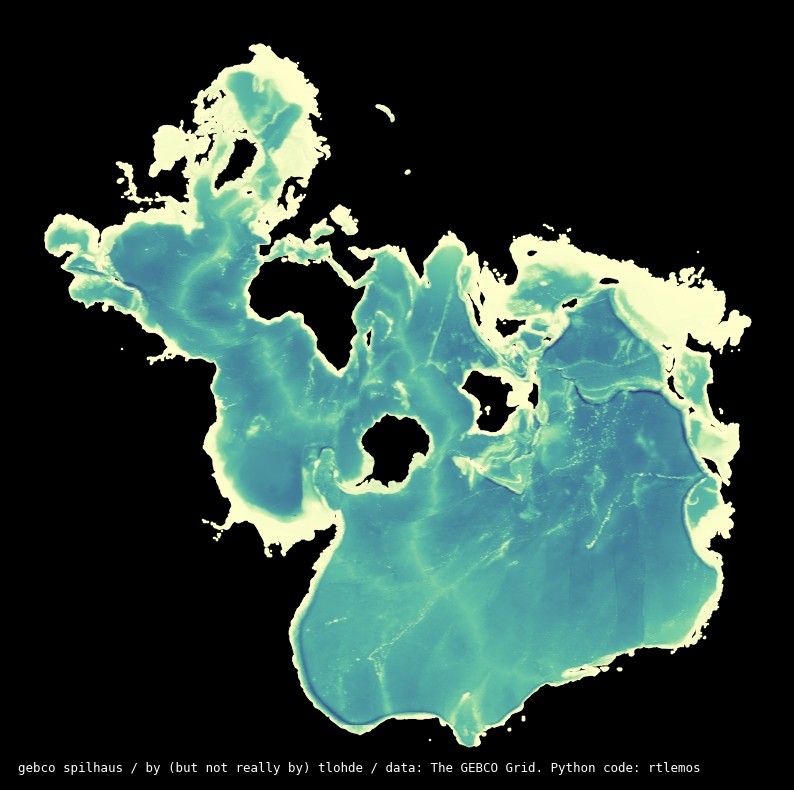

In [28]:
fig, ax = plt.subplots(figsize=[10,10])

ax.scatter(x=pretty.loc[idx, 'x'],
           y=pretty.loc[idx, 'y'],
           c=pretty.loc[idx, 'z'],
           marker='s',
           s=72./fig.dpi,
           cmap=cmocean.cm.deep_r)

ax.annotate('gebco spilhaus / by (but not really by) tlohde / data: The GEBCO Grid. Python code: rtlemos',
            xy=(0.01, 0.01),
            xycoords='axes fraction',
            font='DejaVu Sans Mono',
            color='w',
            size=9)

ax.set_axis_off()
fig.patch.set_facecolor('k')

fig.savefig('day28.png', dpi=300, bbox_inches='tight')